# plt.contour([X, Y,] Z, [levels], ** kwargs)

- X, Y : array-like, optional
Z中值的坐标。
X和Y必须都是二维的，形状与Z相同(例如，通过numpy.meshgrid创建)，或者它们必须都是一维的，这样len(X) = M是Z中的列数，len(Y) = N是Z中的行数。
如果没有给出，则假设它们是整数索引，即X = range(M)， Y = range(N)。

- Z : array-like(N, M)
绘制轮廓的高度值

- levels : int or array-like, optional
确定轮廓线/区域的数量和位置

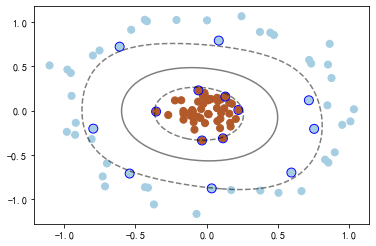

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

X, y = make_circles(100, factor=.1, noise=.1, random_state=2019)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Paired)
clf = SVC(kernel='rbf')
clf.fit(X, y)

# 画等高线
ax = plt.gca()
x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
x_1, y_1 = np.meshgrid(x, y)
P = np.zeros_like(x_1)
for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        P[i, j] = clf.decision_function(np.array([[xi, yj]]))
plt.contour(x_1, y_1, P, colors='k', levels=[-1, 0, 0.9], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], edgecolor='b',
            s=80, facecolors='none')